In [104]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import glob
import string
import scipy.stats as stats

# for visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# for model building
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb



import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.options.display.max_rows = 200
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

/var/folders/kw/dchp08qs3lqgjzpc8kwkl5xr0000gn/T/ipykernel_14659/1508922331.py:40: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


# Import Datasets

In [105]:
missing_values = ["n/a", "na", "--", "", "XNA", "Unknown", "unknown"]
df_app = pd.read_csv("archive/application_data.csv", na_values=missing_values)

print("Shape of application data: ", df_app.shape)

Shape of application data:  (307511, 122)


In [106]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [107]:
df_app.describe().applymap(lambda x: f'{x:.1f}' if isinstance(x, (int, float)) else x)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307511.0,307511.0,307511.0,307499.0,307233.0,307511.0,307511.0,307511.0,307511.0,307511.0,104582.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307509.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,134133.0,306851.0,246546.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,159080.0,306490.0,306490.0,306490.0,306490.0,307510.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278180.5,0.1,0.4,168797.9,599026.0,27108.6,538396.2,0.0,-16037.0,63815.0,-4986.1,-2994.2,12.1,1.0,0.8,0.2,1.0,0.3,0.1,2.2,2.1,2.0,12.1,0.0,0.1,0.0,0.1,0.2,0.2,0.5,0.5,0.5,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,1.4,0.1,1.4,0.1,-962.9,0.0,0.7,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,1.9
std,102790.2,0.3,0.7,237123.1,402490.8,14493.7,369446.5,0.0,4364.0,141275.8,3522.9,1509.5,11.9,0.0,0.4,0.4,0.0,0.4,0.2,0.9,0.5,0.5,3.3,0.1,0.2,0.2,0.3,0.4,0.4,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.1,2.4,0.4,2.4,0.4,826.8,0.0,0.5,0.0,0.1,0.3,0.0,0.3,0.1,0.0,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.2,0.9,0.8,1.9
min,100002.0,0.0,0.0,25650.0,45000.0,1615.5,40500.0,0.0,-25229.0,-17912.0,-24672.0,-7197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

<h1>EDA</h1>

## - Data Shape

The application dataset consists of 307511 observations, and 122 features.


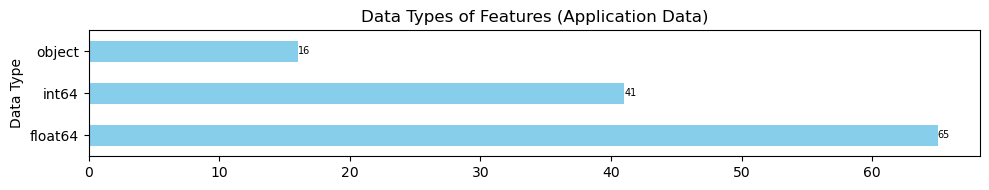

In [108]:
# Plot the first subplot
dTypesCount_app = df_app.dtypes.value_counts()
print(f"The application dataset consists of {df_app.shape[0]} observations, and {df_app.shape[1]} features.")

dTypesCount_app.plot(kind='barh', color='skyblue',figsize=(10,2))
for index, value in enumerate(dTypesCount_app):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=7)
plt.title("Data Types of Features (Application Data)")
plt.ylabel("Data Type")



plt.tight_layout()
plt.show()

## - Missing Values Percentage Per Column

Number of columns with missing values in the application dataset: 70 out of 122, with average missing percentage of 42.78%
Number of columns with >=40% missing values: 49


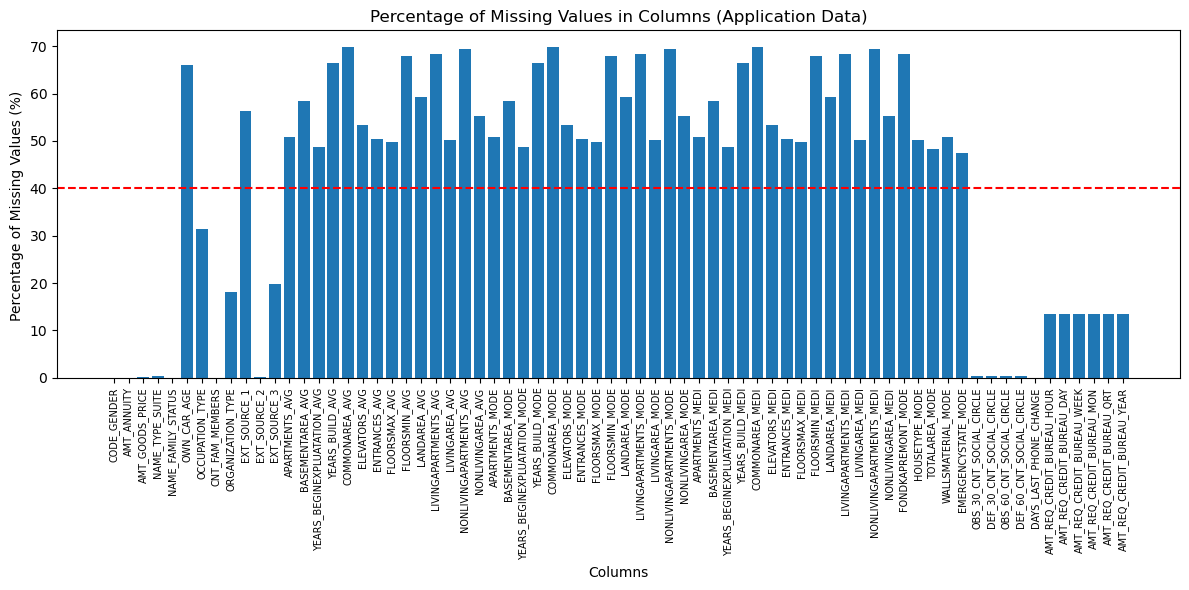

In [109]:
total = df_app.shape[0]

missing_in_col_cnt = {}
missing_in_col_per = {}
for col in df_app.columns:
    missing_in_col_cnt[col] = df_app[col].isnull().sum()
    missing_in_col_per[col] = (missing_in_col_cnt[col] / total) * 100

# Filter out columns with zero missing values
columns_with_missing = {col: percent for col, percent in missing_in_col_per.items() if percent > 0}

print(f"Number of columns with missing values in the application dataset: {len(columns_with_missing)} out of {len(df_app.columns)}, with average missing percentage of {np.mean(list(columns_with_missing.values())):.2f}%")
print(f"Number of columns with >=40% missing values: {len([percent for percent in columns_with_missing.values() if percent >= 40])}")
x = columns_with_missing.keys()
y = columns_with_missing.values()
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation='vertical', fontsize = 7)

plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%) ')
plt.title('Percentage of Missing Values in Columns (Application Data)')
plt.axhline(40, ls='--',color='red')
plt.tight_layout()
plt.show()

## - Gender Distribution

There are 3 gender values, ['M' 'F' nan] 


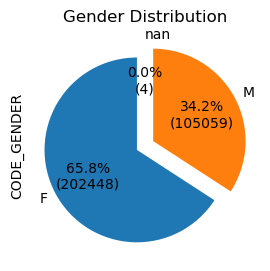

F      202448
M      105059
NaN    4     
Name: CODE_GENDER, dtype: int64


In [110]:
# format count with percentages
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(genders)*x/100)

genders = df_app['CODE_GENDER']
unique_genders = genders.unique()
print(f"There are {len(unique_genders)} gender values, {unique_genders} ")
genders.value_counts(dropna=False).plot.pie(figsize=(3,3), autopct=my_fmt, startangle=90, explode=(0.1,0.1,0.1))
plt.title("Gender Distribution")
plt.show()
print(genders.value_counts(dropna=False))

## - Car Ownership

Car ownership flag can have 2 values, ['N' 'Y'] 
Only 34.01% of all people own a car.


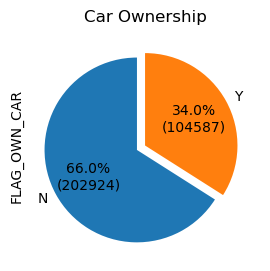

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


In [111]:
# format count with percentages
def my_fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(cars) * x / 100)


cars = df_app["FLAG_OWN_CAR"]
unique_cars = cars.unique()
print(f"Car ownership flag can have {len(unique_cars)} values, {unique_cars} ")
print(f"Only {round(cars.value_counts()[1] * 100 / len(cars),2)}% of all people own a car.")
cars.value_counts(dropna=False).plot.pie(figsize=(3, 3), autopct=my_fmt, startangle=90, explode = (0.1,0))
plt.title("Car Ownership")
plt.show()
print(cars.value_counts(dropna=False))

## - Region Rating vs Target

/var/folders/kw/dchp08qs3lqgjzpc8kwkl5xr0000gn/T/ipykernel_14659/2116076628.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])


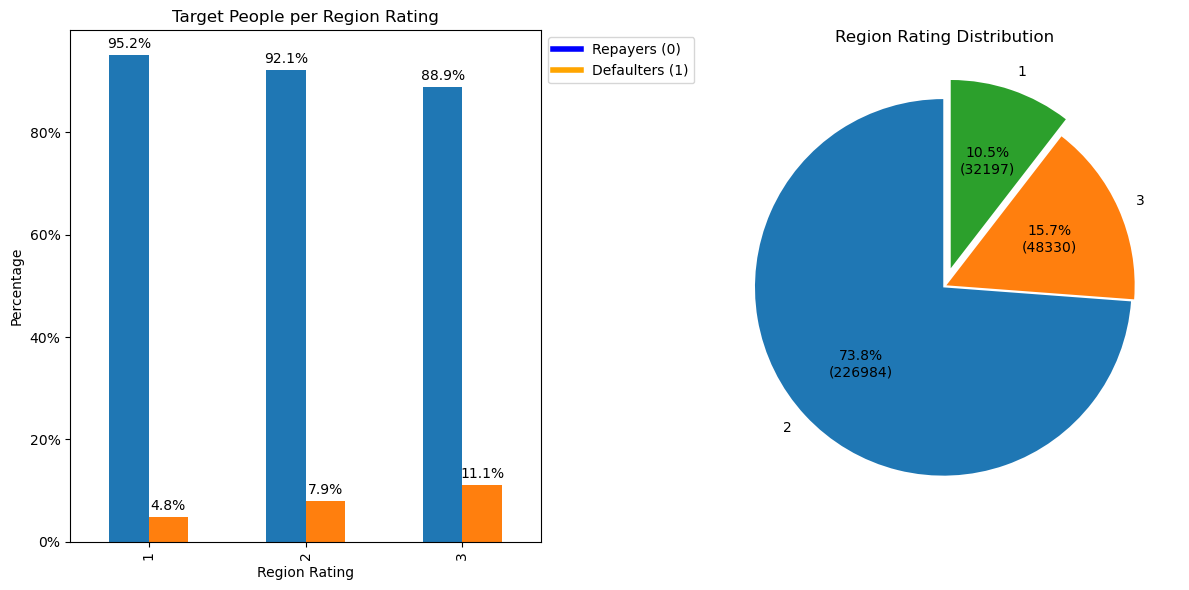

In [112]:
# format count with percentages
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(regions)*x/100)

regions = df_app['REGION_RATING_CLIENT']
grouped = df_app.groupby('REGION_RATING_CLIENT')['TARGET'].value_counts(normalize=True).unstack() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

grouped.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_xlabel('Region Rating')
ax1.set_ylabel('Percentage')
ax1.set_title('Target People per Region Rating')
accepted_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Repayers (0)')
unaccepted_patch = plt.Line2D([0], [0], color='orange', lw=4, label='Defaulters (1)')
ax1.legend(handles=[accepted_patch, unaccepted_patch], loc='upper left', bbox_to_anchor=(1, 1))

for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.annotate('{:.1f}%'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])

region_rating_counts = df_app['REGION_RATING_CLIENT'].value_counts()
ax2.pie(region_rating_counts, labels=region_rating_counts.index, autopct=my_fmt, startangle=90, explode = (0.01,0.01,0.1))
ax2.set_title('Region Rating Distribution')

plt.tight_layout()
plt.show()



## - Income Analysis

/var/folders/kw/dchp08qs3lqgjzpc8kwkl5xr0000gn/T/ipykernel_14659/1233860693.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])


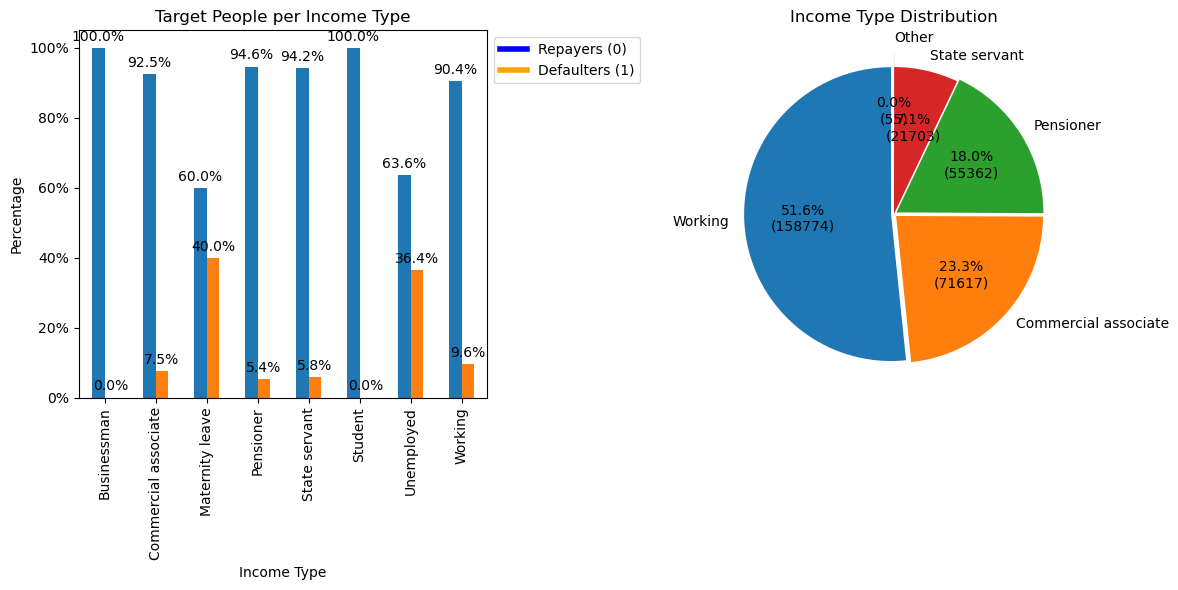

In [113]:
# format count with percentages
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(income_types)*x/100)
income_types = df_app['NAME_INCOME_TYPE']

grouped = df_app.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).unstack() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

grouped.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_xlabel('Income Type')
ax1.set_ylabel('Percentage')
ax1.set_title('Target People per Income Type')
accepted_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Repayers (0)')
unaccepted_patch = plt.Line2D([0], [0], color='orange', lw=4, label='Defaulters (1)')
ax1.legend(handles=[accepted_patch, unaccepted_patch], loc='upper left', bbox_to_anchor=(1, 1))

for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.annotate('{:.1f}%'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax1.set_yticklabels([f"{int(tick)}%" for tick in ax1.get_yticks()])

work_type_counts = df_app['NAME_INCOME_TYPE'].value_counts()
s = work_type_counts.sum()
other_indicies = []
other = 0
for x in range(len(work_type_counts)):
    work_type_counts[x] = work_type_counts[x] / s * 100
    if work_type_counts[x] < 1:
        other += work_type_counts[x]
        other_indicies.append(work_type_counts.index[x])
p = work_type_counts.drop(other_indicies, inplace=False)
p['Other'] = other

ax2.pie(p, labels=p.index, autopct=my_fmt, startangle=90, explode = (0.02,0.02,0.02,0,0.1))
ax2.set_title('Income Type Distribution')

plt.tight_layout()
plt.show()



There are 0  null values in AMT_INCOME_TOTAL column.
There are 14035 outliers in AMT_INCOME_TOTAL column.


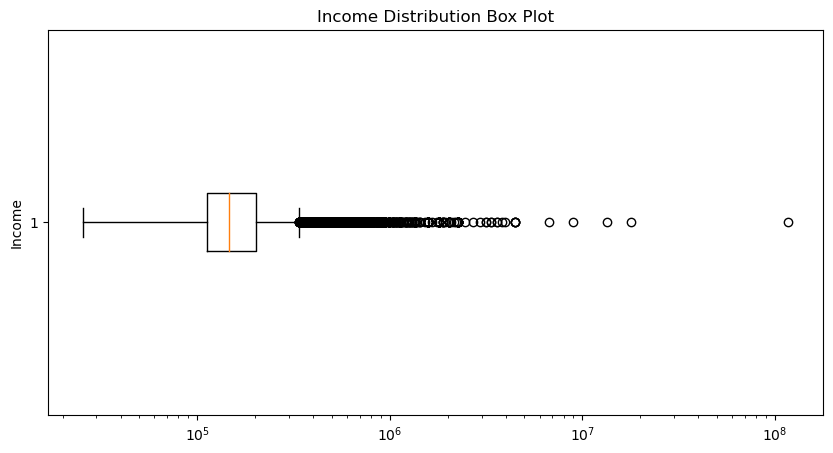

count    307511.0   
mean     168797.9   
std      237123.1   
min      25650.0    
25%      112500.0   
50%      147150.0   
75%      202500.0   
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: object


In [114]:
income = df_app["AMT_INCOME_TOTAL"]
print(f"There are {df_app['AMT_INCOME_TOTAL'].isna().sum()}  null values in AMT_INCOME_TOTAL column.")

iqr = income.quantile(0.75) - income.quantile(0.25)
upper_whisker = income.quantile(0.75) + 1.5*iqr
print(f"There are {len(income[income > upper_whisker])} outliers in AMT_INCOME_TOTAL column.")


plt.figure(figsize=(10, 5))
plt.boxplot(income, vert = False)
plt.title("Income Distribution Box Plot")
plt.ylabel("Income")
plt.xscale("log")
plt.show()

print(income.describe().apply(lambda x: f'{x:.1f}' if isinstance(x, (int, float)) else x))

There are 12  null values in AMT_ANNUITY column.
There are 7504 outliers in AMT_ANNUITY column.


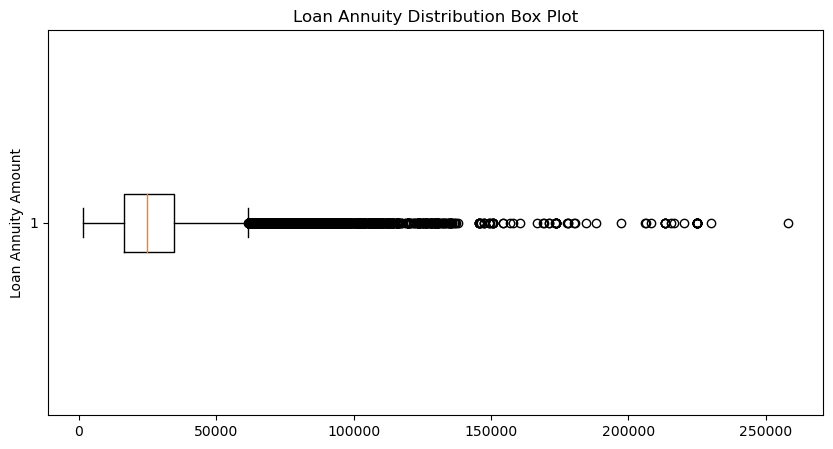

count    307499.0
mean     27108.6 
std      14493.7 
min      1615.5  
25%      16524.0 
50%      24903.0 
75%      34596.0 
max      258025.5
Name: AMT_ANNUITY, dtype: object


In [115]:
annuity = df_app["AMT_ANNUITY"].dropna()
print(f"There are {df_app['AMT_ANNUITY'].isna().sum()}  null values in AMT_ANNUITY column.")

iqr = annuity.quantile(0.75) - annuity.quantile(0.25)
upper_whisker = annuity.quantile(0.75) + 1.5*iqr
print(f"There are {len(annuity[annuity > upper_whisker])} outliers in AMT_ANNUITY column.")

plt.figure(figsize=(10, 5))
plt.boxplot(annuity, vert = False)
plt.title("Loan Annuity Distribution Box Plot")
plt.ylabel("Loan Annuity Amount")
# plt.xscale("log")
plt.show()
print(annuity.describe().apply(lambda x: f'{x:.1f}' if isinstance(x, (int, float)) else x))


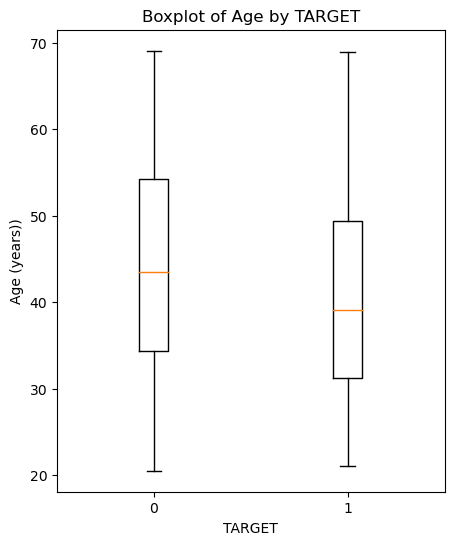

In [116]:
age_in_years = df_app['DAYS_BIRTH'].apply(lambda x: abs(x)/365.25)  

plt.figure(figsize=(5, 6))
plt.boxplot([age_in_years[df_app['TARGET'] == 0], age_in_years[df_app['TARGET'] == 1]], labels=['0', '1'])
plt.xlabel('TARGET')
plt.ylabel('Age (years))')
plt.title('Boxplot of Age by TARGET')
plt.show()

## - Correlation Matrices

## - Check categorical features defined as numeric to be converted to object

In [117]:
print(f"Total number of columns in application dataset: {df_app.shape[1]}")
print("\nBefore Casting:")
print(f"Number of numeric columns in application dataset: {df_app.select_dtypes(include=np.number).shape[1]}")
print(f"Number of categorical columns in application dataset: {df_app.select_dtypes(include='object').shape[1]}")

for col in df_app.select_dtypes(include=np.number).columns:
    if df_app[col].nunique() <= 3:
        df_app[col] = df_app[col].astype("object")

print("After casting:")
print(f"Number of numeric columns in application dataset: {df_app.select_dtypes(include=np.number).shape[1]}")
print(f"Number of categorical columns in application dataset: {df_app.select_dtypes(include='object').shape[1]}")

Total number of columns in application dataset: 122

Before Casting:
Number of numeric columns in application dataset: 106
Number of categorical columns in application dataset: 16
After casting:
Number of numeric columns in application dataset: 71
Number of categorical columns in application dataset: 51


- Helper function that calculates Cramer's-V correlation for categorical features correlation calculations:

In [118]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))


### - Contact Info vs Target

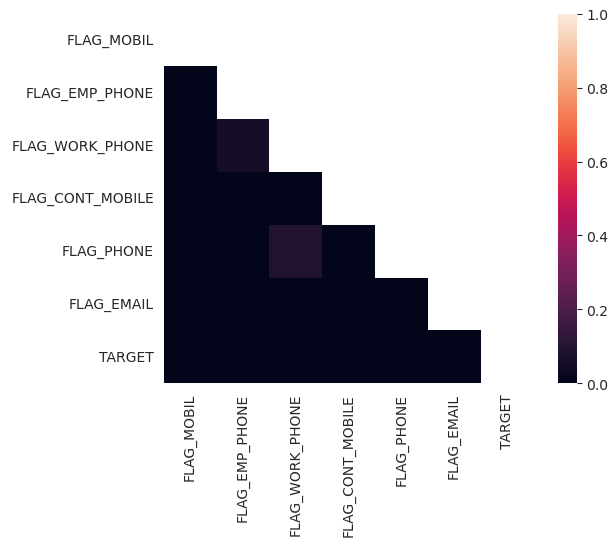

In [119]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']

#encode categories into 0,1,2
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()
for i in df_app[contact_col].columns:
  data_encoded[i]=label.fit_transform(df_app[i])
  
#calculate cramer's V for each pair of features
rows= []
for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,3))
  rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

#plot heatmap of cramer's V
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

### - Documents Submission vs Target

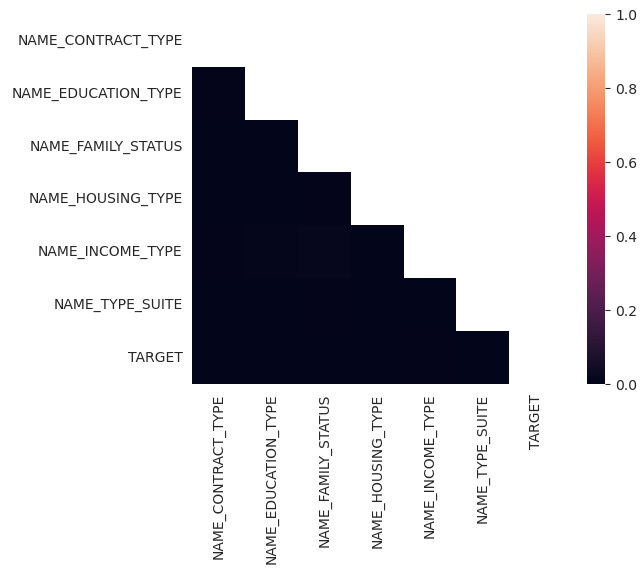

In [120]:
documents_cols = [
    "NAME_CONTRACT_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "NAME_INCOME_TYPE",
    "NAME_TYPE_SUITE",
    "TARGET",
]

#encode categories into 0,1,2
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()
for i in df_app[documents_cols].columns:
  data_encoded[i]=label.fit_transform(df_app[i])
  
#calculate cramer's V for each pair of features
rows= []
for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,3))
  rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

#plot heatmap of cramer's V
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

# Dropping Unnecassary Features

## - Drop columns with >=40% missing values.

In [121]:
total = df_app.shape[0]
df_app_new = df_app.copy()
missing_in_col_cnt = {}
missing_in_col_per = {}
for col in df_app_new.columns:
    missing_in_col_cnt[col] = df_app_new[col].isnull().sum()
    missing_in_col_per[col] = (missing_in_col_cnt[col] / total) * 100
columns_with_missing = {col: percent for col, percent in missing_in_col_per.items() if percent >= 40}
missing_cols_names = list(columns_with_missing.keys())
df_app_new.drop(missing_cols_names, axis=1, inplace=True)
print("For Application Data file:")
print("Total number of columns before dropping: ", len(df_app.columns))
print(f"Dropped {len(missing_cols_names)} columns with more than 40% missing values.")
print(f"Total number of columns after dropping: {len(df_app_new.columns)}")
print(f"Number of numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Number of object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

For Application Data file:
Total number of columns before dropping:  122
Dropped 49 columns with more than 40% missing values.
Total number of columns after dropping: 73
Number of numeric columns: 26
Number of object columns: 47


## - Check abnormal null values manually in remaining object types:

<p style="color:green"> Found ['Unknown'] in NAME_FAMILY_STATUS column. Added "Unknown", "unknown" in null-like values while importing. </p>

In [122]:
print(len(df_app_new.select_dtypes(include=['object']).columns))
for col in df_app_new.columns:
    if df_app_new[col].dtype == "object":
        print(col, df_app_new[col].dropna().unique())

47
TARGET [1 0]
NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
FLAG_MOBIL [1 0]
FLAG_EMP_PHONE [1 0]
FLAG_WORK_PHONE [0 1]
FLAG_CONT_MOBILE [1 0]
FLAG_PHONE [1 0]
FLAG_EMAIL [0 1]
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service s

## - Drop numeric features with correlation <0.05 to Target

In [123]:
print(f"Total number of columns before dropping: {len(df_app_new.columns)}")
print(f"Numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

corr_threshold = 0.05
uncorrelated_cols = []
for col in df_app_new.columns:
    if df_app_new[col].dtype == "object":
        continue
    elif abs(df_app_new['TARGET'].astype("int").corr(df_app_new[col])) < corr_threshold:
        uncorrelated_cols.append(col)
df_app_new.drop(uncorrelated_cols, axis=1, inplace=True)

print(f"\nNumber of uncorrelated numeric columns to the Target variable (corr <{corr_threshold}): {len(uncorrelated_cols)}")
print(f"Total Number of columns after dropping: {len(df_app_new.columns)}")
print(f"Numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

Total number of columns before dropping: 73
Numeric columns: 26
Object columns: 47

Number of uncorrelated numeric columns to the Target variable (corr <0.05): 21
Total Number of columns after dropping: 52
Numeric columns: 5
Object columns: 47


## - Drop categorical features with correlation <0.05 to Target

In [124]:
print(f"Total number of columns before dropping: {len(df_app_new.columns)}")
print(f"Numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

corr_threshold = 0.001

#encode categories into 0,1,2
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()
for i in df_app_new.select_dtypes(include="object").columns:
  data_encoded[i]=label.fit_transform(df_app_new[i])
  
uncorrelated_cols = []
#calculate cramer's V for each pair of features
for var1 in data_encoded:
    cramers =cramers_V(data_encoded["TARGET"], data_encoded[var1])
    if(cramers < corr_threshold):
        uncorrelated_cols.append((var1, cramers))

# df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
# print(set(df_app_new.select_dtypes(include=['object']).columns) - set(col for col, _ in uncorrelated_cols))

df_app_new.drop([col for col, _ in uncorrelated_cols], axis=1, inplace=True)


print(f"\nNumber of uncorrelated categorical columns to the Target variable (corr <{corr_threshold}): {len(uncorrelated_cols)}")
print(f"Total Number of columns after dropping: {len(df_app_new.columns)}")
print(f"Numeric columns: {len(df_app_new.select_dtypes(include=np.number).columns)}")
print(f"Object columns: {len(df_app_new.select_dtypes(include=['object']).columns)}")

Total number of columns before dropping: 52
Numeric columns: 5
Object columns: 47

Number of uncorrelated categorical columns to the Target variable (corr <0.001): 32
Total Number of columns after dropping: 20
Numeric columns: 5
Object columns: 15


# - Handling Numeric Missing Data:

In [125]:
df_app_new.select_dtypes(include=np.number).isna().sum()

DAYS_BIRTH                0    
DAYS_ID_PUBLISH           0    
EXT_SOURCE_2              660  
EXT_SOURCE_3              60965
DAYS_LAST_PHONE_CHANGE    1    
dtype: int64

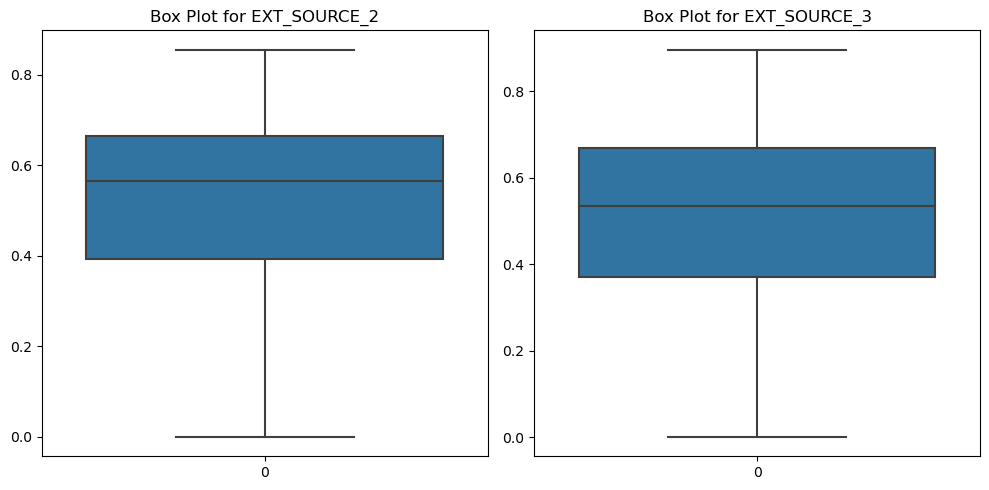

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first box plot
sns.boxplot(df_app_new['EXT_SOURCE_2'], ax=axs[0])
axs[0].set_title('Box Plot for EXT_SOURCE_2')

# Plot the second box plot
sns.boxplot(df_app_new['EXT_SOURCE_3'], ax=axs[1])
axs[1].set_title('Box Plot for EXT_SOURCE_3')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- Fill with mean since no outliers found

In [127]:
df_app_new["EXT_SOURCE_2"].fillna(df_app_new["EXT_SOURCE_2"].mean(), inplace=True)
df_app_new["EXT_SOURCE_3"].fillna(df_app_new["EXT_SOURCE_3"].mean(), inplace=True)
df_app_new.select_dtypes(include=np.number).isna().sum()

DAYS_BIRTH                0
DAYS_ID_PUBLISH           0
EXT_SOURCE_2              0
EXT_SOURCE_3              0
DAYS_LAST_PHONE_CHANGE    1
dtype: int64

- Check for DAYS_LAST_PHONE_CHANGE outliers

<Axes: >

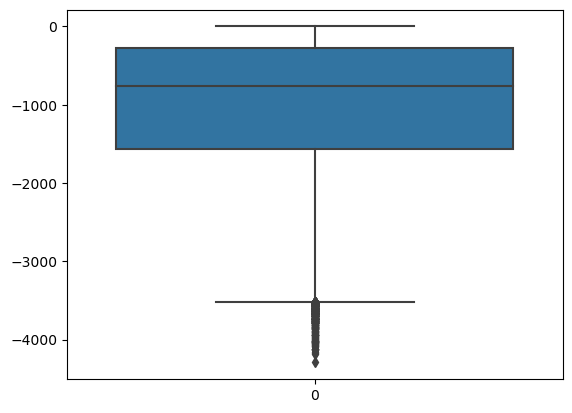

In [128]:
sns.boxplot(df_app_new['DAYS_LAST_PHONE_CHANGE'])

- Fill with median value since there are outliers.

In [129]:
df_app_new["DAYS_LAST_PHONE_CHANGE"].fillna(df_app_new["DAYS_LAST_PHONE_CHANGE"].median(), inplace=True)
df_app_new.select_dtypes(include=np.number).isna().sum()

DAYS_BIRTH                0
DAYS_ID_PUBLISH           0
EXT_SOURCE_2              0
EXT_SOURCE_3              0
DAYS_LAST_PHONE_CHANGE    0
dtype: int64

# - Handling Categorical Missing Data:

In [130]:
df_app_new.select_dtypes(include="object").isna().sum()

TARGET                         0    
CODE_GENDER                    4    
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             2    
NAME_HOUSING_TYPE              0    
FLAG_EMP_PHONE                 0    
OCCUPATION_TYPE                96391
REGION_RATING_CLIENT           0    
REGION_RATING_CLIENT_W_CITY    0    
REG_CITY_NOT_LIVE_CITY         0    
REG_CITY_NOT_WORK_CITY         0    
LIVE_CITY_NOT_WORK_CITY        0    
ORGANIZATION_TYPE              55374
FLAG_DOCUMENT_3                0    
dtype: int64

- Fill missing values in categorical features with mode values

In [131]:
df_app_new["CODE_GENDER"].fillna(df_app_new["CODE_GENDER"].mode()[0], inplace=True)
df_app_new["NAME_FAMILY_STATUS"].fillna(df_app_new["NAME_FAMILY_STATUS"].mode()[0], inplace=True)
df_app_new["OCCUPATION_TYPE"].fillna(df_app_new["OCCUPATION_TYPE"].mode()[0], inplace=True)
df_app_new["ORGANIZATION_TYPE"].fillna(df_app_new["ORGANIZATION_TYPE"].mode()[0], inplace=True)
df_app_new.select_dtypes(include="object").isna().sum()

TARGET                         0
CODE_GENDER                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_EMP_PHONE                 0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_3                0
dtype: int64

# - Numeric Features Standardization

- Standardization scales the column values to a normal distribution where mean = 0, and standard deviation = 1

In [132]:
df_app_scaled = df_app_new.copy()
for col in df_app_new.select_dtypes(include= np.number).columns:
    df_app_scaled[col] = StandardScaler().fit_transform(df_app_new[col].values.reshape(-1, 1))


In [133]:
df_app_scaled.select_dtypes(include= np.number).describe()

,DAYS_BIRTH,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05
mean,3.364271e-17,6.732007e-17,-9.658414e-17,-3.936844e-16,-4.681327e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.106335e+00,-2.784328e+00,-2.695205e+00,-2.925107e+00,-4.026510e+00
25%,-8.352476e-01,-8.644204e-01,-6.361853e-01,-5.373790e-01,-7.343222e-01
50%,6.576450e-02,-1.721143e-01,2.676093e-01,0.000000e+00,2.489800e-01
75%,8.304332e-01,8.441512e-01,7.808512e-01,7.194798e-01,8.331558e-01
max,1.958761e+00,1.983641e+00,1.784640e+00,2.207658e+00,1.164552e+00


# - Categorical Features Encoding

- Binary encoding features of 2 unique values only:

In [134]:
cats_nunique = df_app_new.select_dtypes(include="object").nunique()
for col in cats_nunique[cats_nunique == 2].index:
    if col != "TARGET":
        unique_values = df_app_new[col].unique()
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df_app_scaled[col] = df_app_new[col].map(mapping)


- Frequency encoding features of >2 unique values:

In [135]:
for col in cats_nunique[cats_nunique > 2].index:
    frequency_encoding = df_app_new[col].value_counts(normalize=True)
    df_app_scaled[col] = df_app_new[col].map(frequency_encoding)

- All of our features are now numeric dtype

In [136]:
df_app_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  int64  
 2   NAME_INCOME_TYPE             307511 non-null  float64
 3   NAME_EDUCATION_TYPE          307511 non-null  float64
 4   NAME_FAMILY_STATUS           307511 non-null  float64
 5   NAME_HOUSING_TYPE            307511 non-null  float64
 6   DAYS_BIRTH                   307511 non-null  float64
 7   DAYS_ID_PUBLISH              307511 non-null  float64
 8   FLAG_EMP_PHONE               307511 non-null  int64  
 9   OCCUPATION_TYPE              307511 non-null  float64
 10  REGION_RATING_CLIENT         307511 non-null  float64
 11  REGION_RATING_CLIENT_W_CITY  307511 non-null  float64
 12  REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 13 

# - Data Split

- Random splitting data into 80% training and 20% testing

In [137]:
X = df_app_scaled.drop("TARGET", axis=1)
y = df_app_scaled["TARGET"].astype("category")

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# - OverSampling

- Since dataset is obviously imbalanced where 92% of the observations belong to one class, Oversampling is used to increase the minor class instances count until the class distribution balances.
- There are several oversampling techniques, but we will use SMOTE here.
- Oversampling takes place after train, test split of the data to prevent data leakage.

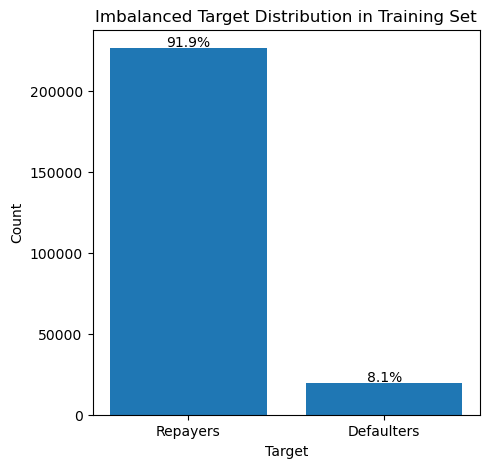

In [139]:
# Vizualize target distribution in training set with percentage on each bar
plt.figure(figsize=(5,5))
counts = y_train.value_counts()
total = len(X_train)
plt.bar([0, 1], [counts[0], counts[1]])
# write percentages
for i, count in enumerate(counts):
    plt.text(i, count + 1000, f"{round((count / total * 100),1)}%", ha="center")
plt.title("Imbalanced Target Distribution in Training Set")
plt.xticks([0, 1], ["Repayers", "Defaulters"])
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [140]:
smote_X_train, smote_y_train = imblearn.over_sampling.SMOTE().fit_resample(X_train, y_train)

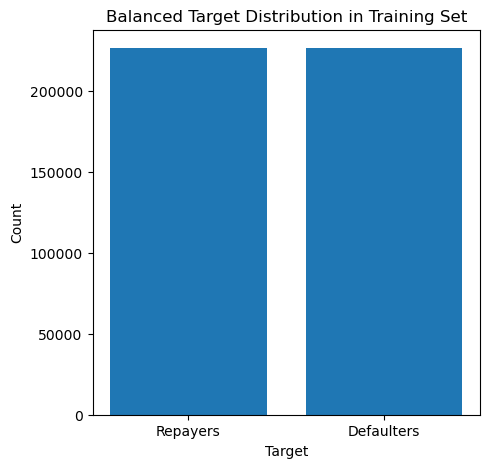

In [141]:
plt.figure(figsize=(5,5))
counts = smote_y_train.value_counts()
total = len(X_train)
plt.bar([0, 1], [counts[0], counts[1]])

plt.title("Balanced Target Distribution in Training Set")
plt.xticks([0, 1], ["Repayers", "Defaulters"])
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# - Logisitic Regression model, without oversampling

In [142]:
predictions = LogisticRegression().fit(X_train, y_train).predict(X_test)

- Very good but misleading accuracy, as recall is too low.
- As a concervative bank, we need to find the balance between Accuracy and Recall.

In [143]:
print(f"Accuracy: {(metrics.accuracy_score(y_test, predictions)*100).round(1)}%")  # (TP + TN) / (TP + TN + FP + FN)
print(f"Precision: {(metrics.precision_score(y_test, predictions)*100).round(1)}%") # TP / (TP + FP)
print(f"Recall: {(metrics.recall_score(y_test, predictions)*100).round(1)}%")   # TP / (TP + FN)
print(f"F1 Score: {(metrics.f1_score(y_test, predictions)).round(1)}")     # 2 * (Precision * Recall) / (Precision + Recall)
print(f"Balanaced Accuracy: {(metrics.balanced_accuracy_score(y_test, predictions)*100).round(1)}%") # (TP / (TP + FN) + TN / (TN + FP)) / 2

print(f"Zero One Loss: {(metrics.zero_one_loss(y_test, predictions)*100).round(1)}%") # (1 - accuracy)
print(f"ROC AUC Score: {(metrics.roc_auc_score(y_test, predictions)*100).round(1)}%") # Area under ROC curve

print(f"Classification Report: \n{metrics.classification_report(y_test, predictions)}")


Accuracy: 91.9%
Precision: 48.1%
Recall: 0.8%
F1 Score: 0.0
Balanaced Accuracy: 50.4%
Zero One Loss: 8.1%
ROC AUC Score: 50.4%
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56500
           1       0.48      0.01      0.02      5003

    accuracy                           0.92     61503
   macro avg       0.70      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



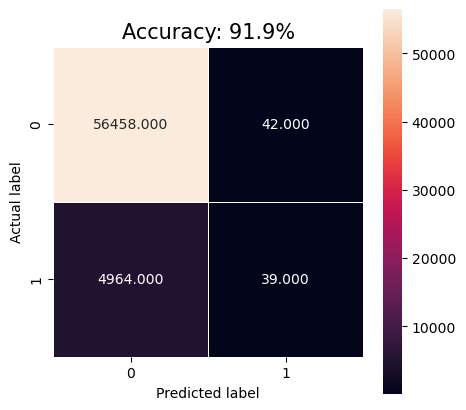

In [144]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');''
plt.title(f"Accuracy: {(metrics.accuracy_score(y_test, predictions)*100).round(1)}%", size = 15);
plt.show()



# - Retry Logisitc Regression After Oversampling

- Much better Recall and balanced accuracy but low accuracy

In [145]:
predictions = LogisticRegression().fit(smote_X_train, smote_y_train).predict(X_test)

print(f"Accuracy: {(metrics.accuracy_score(y_test, predictions)*100).round(1)}%")  # (TP + TN) / (TP + TN + FP + FN)
print(f"Precision: {(metrics.precision_score(y_test, predictions)*100).round(1)}%") # TP / (TP + FP)
print(f"Recall: {(metrics.recall_score(y_test, predictions)*100).round(1)}%")   # TP / (TP + FN)
print(f"F1 Score: {(metrics.f1_score(y_test, predictions)).round(1)}")     # 2 * (Precision * Recall) / (Precision + Recall)
print(f"Balanaced Accuracy: {(metrics.balanced_accuracy_score(y_test, predictions)*100).round(1)}%") # (TP / (TP + FN) + TN / (TN + FP)) / 2

print(f"Zero One Loss: {(metrics.zero_one_loss(y_test, predictions)*100).round(1)}%") # (1 - accuracy)
print(f"ROC AUC Score: {(metrics.roc_auc_score(y_test, predictions)*100).round(1)}%") # Area under ROC curve

print(f"Classification Report: \n{metrics.classification_report(y_test, predictions)}")


Accuracy: 68.1%
Precision: 15.2%
Recall: 63.9%
F1 Score: 0.2
Balanaced Accuracy: 66.2%
Zero One Loss: 31.9%
ROC AUC Score: 66.2%
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56500
           1       0.15      0.64      0.25      5003

    accuracy                           0.68     61503
   macro avg       0.55      0.66      0.52     61503
weighted avg       0.89      0.68      0.75     61503



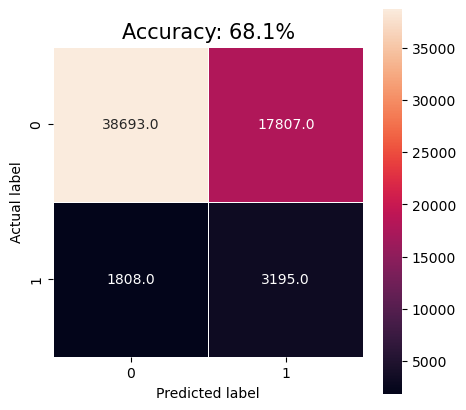

In [146]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f"Accuracy: {(metrics.accuracy_score(y_test, predictions)*100).round(1)}%", size = 15)
plt.show()



# - Hyperparameter Tuning 4 models, oversampled (Balanced) training set

- Balanced accuracy is a statistical measure used to assess the performance of classification models on imbalanced datasets.

- As a concervative bank, we maximize recall.

- In hyperparameter tuning, we try all combinations of models and parameters we feed the GridSearchCV function. 

In [147]:
models = {
    "logistic_regression": {
        "model": LogisticRegression(), 
        "params": {
            "C": [1, 5, 10]
            }
        },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [40, 50, 100],
            "max_depth": [None, 5, 10]
        },
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(),
        "params": {
            "n_estimators": [10, 50, 100],
            "learning_rate": [0.1, 0.5, 1],
            "max_depth": [None, 5, 10]
        },
    },
    "knn": {
        "model": KNeighborsClassifier(), 
        "params": {
            "n_neighbors": [5, 10, 15]
            }
        },
}

In [100]:
scores = []
for model_name, model_params in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(model_params["model"], model_params["params"], cv=5, return_train_score=False,  scoring="balanced_accuracy")
    clf.fit(smote_X_train, smote_y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_,
        "best_estimator": clf.best_estimator_,
        "best_index": clf.best_index_,
        "cv_results": clf.cv_results_,
        "best_test_score": clf.score(X_test, y_test),
        "best_test_predictions": clf.predict(X_test),
        "best_test_accuracy": metrics.accuracy_score(y_test, clf.predict(X_test)),
        "best_test_precision": metrics.precision_score(y_test, clf.predict(X_test)),
        "best_test_recall": metrics.recall_score(y_test, clf.predict(X_test)),
        "best_test_balanced_accuracy": metrics.balanced_accuracy_score(y_test, clf.predict(X_test)),
        "results": clf.cv_results_,
    })

Training logistic_regression...
Training random_forest...
Training XGBoost...
Training knn...


In [102]:
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params", "best_test_score", "best_test_accuracy", "best_test_precision", "best_test_recall", "best_test_balanced_accuracy"])
df_scores

,model,best_score,best_params,best_test_score,best_test_accuracy,best_test_precision,best_test_recall,best_test_balanced_accuracy
0,logistic_regression,0.676936,{'C': 1},0.662396,0.680633,0.152264,0.640616,0.662396
1,random_forest,0.951190,"{'max_depth': None, 'n_estimators': 100}",0.516938,0.910947,0.247335,0.046372,0.516938
2,XGBoost,0.936930,"{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}",0.524619,0.906818,0.241844,0.068159,0.524619
3,knn,0.853357,{'n_neighbors': 5},0.575605,0.708616,0.122015,0.416750,0.575605


## - Trying XGBoost best params on oversampled training set at different cutoffs

In [150]:
results = []
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.5, max_depth=10).fit(smote_X_train, smote_y_train)
for cut in np.arange(0.35, 0.8, 0.05):
    predictions = (model.predict_proba(X_test)[:, 1] >= cut).astype(int)
    precision = metrics.precision_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions)
    accuracy = metrics.accuracy_score(y_test, predictions)
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, predictions)
    results.append({
        "cutoff": cut,
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "balanced_accuracy": balanced_accuracy
    })
results = pd.DataFrame(results)
results

,cutoff,precision,recall,accuracy,balanced_accuracy
0,0.35,0.208380,0.150110,0.884477,0.549807
1,0.40,0.222600,0.117729,0.894786,0.540661
2,0.45,0.229306,0.089147,0.901533,0.531308
3,0.50,0.240358,0.069758,0.906395,0.525118
4,0.55,0.245964,0.051769,0.909956,0.518858
5,0.60,0.257677,0.038577,0.912752,0.514368
6,0.65,0.254647,0.027384,0.914362,0.510143
7,0.70,0.273743,0.019588,0.916020,0.507493
8,0.75,0.278261,0.012792,0.916996,0.504927


## - Trying Random Forest best params on oversampled training set at different cutoffs

In [151]:
results = []
model = RandomForestClassifier(max_depth=None, n_estimators=100).fit(smote_X_train, smote_y_train)
for cut in np.arange(0.35, 0.8, 0.05):
    predictions = (model.predict_proba(X_test)[:, 1] >= cut).astype(int)
    precision = metrics.precision_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions)
    accuracy = metrics.accuracy_score(y_test, predictions)
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, predictions)
    results.append({
        "cutoff": cut,
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "balanced_accuracy": balanced_accuracy
    })
results = pd.DataFrame(results)
results

,cutoff,precision,recall,accuracy,balanced_accuracy
0,0.35,0.220484,0.185888,0.880315,0.563847
1,0.40,0.231666,0.123126,0.895452,0.543483
2,0.45,0.244838,0.082950,0.904590,0.530148
3,0.50,0.250720,0.052169,0.910216,0.519182
4,0.55,0.254019,0.031581,0.913679,0.511684
5,0.60,0.288828,0.021187,0.916134,0.508284
6,0.65,0.291080,0.012393,0.917207,0.504860
7,0.70,0.268908,0.006396,0.917760,0.502428
8,0.75,0.263158,0.002998,0.918215,0.501127


<p style = "color:green">- High accuracy doesn't always denote good results, and it might be misleading sometimes, as both recall and precision are too low! </p>

# - Hyperparameter Tuning 4 models, Imbalanced training set

In [153]:
models = {
    "logistic_regression": {
        "model": LogisticRegression(), 
        "params": {
            "C": [1, 5, 10]
            }
        },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [40, 50, 100],
            "max_depth": [None, 5, 10]
        },
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(),
        "params": {
            "n_estimators": [10, 50, 100],
            "learning_rate": [0.1, 0.5, 1],
            "max_depth": [None, 5, 10],
            "scale_pos_weight": [5, 7, 10]
        },
    },
    "knn": {
        "model": KNeighborsClassifier(), 
        "params": {
            "n_neighbors": [3, 5, 10]
            }
        },
}

In [154]:
scores = []
for model_name, model_params in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(model_params["model"], model_params["params"], cv=5, return_train_score=False,  scoring="balanced_accuracy")
    clf.fit(X_train, y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_,
        "best_estimator": clf.best_estimator_,
        "best_index": clf.best_index_,
        "cv_results": clf.cv_results_,
        "best_test_score": clf.score(X_test, y_test),
        "best_test_predictions": clf.predict(X_test),
        "best_test_accuracy": metrics.accuracy_score(y_test, clf.predict(X_test)),
        "best_test_precision": metrics.precision_score(y_test, clf.predict(X_test)),
        "best_test_recall": metrics.recall_score(y_test, clf.predict(X_test)),
        "best_test_balanced_accuracy": metrics.balanced_accuracy_score(y_test, clf.predict(X_test)),
        "results": clf.cv_results_,
    })

Training logistic_regression...
Training random_forest...
Training XGBoost...
Training knn...


In [155]:
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params", "best_test_score", "best_test_accuracy", "best_test_precision", "best_test_recall", "best_test_balanced_accuracy"])
df_scores

,model,best_score,best_params,best_test_score,best_test_accuracy,best_test_precision,best_test_recall,best_test_balanced_accuracy
0,logistic_regression,0.503053,{'C': 5},0.503526,0.918606,0.481481,0.007795,0.503526
1,random_forest,0.504462,"{'max_depth': None, 'n_estimators': 40}",0.506579,0.918524,0.474026,0.014591,0.506579
2,XGBoost,0.671374,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 10}",0.665246,0.723526,0.165915,0.595643,0.665246
3,knn,0.523763,{'n_neighbors': 3},0.522198,0.901029,0.195847,0.069758,0.522198


<p style = "color:green">Since we are looking for a balance between recall and accuracy, XBGoost provides us the results we want with imbalanced data.</p>

<p style = "color:green">XGBoost uses the scale_pos_weight parameter to handle the minority class.</p>

## - Trying XGBoost best params on imbalanced training set at different cutoffs

In [157]:
results = []
model = xgb.XGBClassifier(learning_rate = 0.1, max_depth =  5, n_estimators = 100, scale_pos_weight = 10).fit(X_train, y_train)
for cut in np.arange(0.35, 0.8, 0.05):
    predictions = (model.predict_proba(X_test)[:, 1] >= cut).astype(int)
    precision = metrics.precision_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions)
    accuracy = metrics.accuracy_score(y_test, predictions)
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, predictions)
    results.append({
        "cutoff": cut,
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "balanced_accuracy": balanced_accuracy
    })
results = pd.DataFrame(results)
results

,cutoff,precision,recall,accuracy,balanced_accuracy
0,0.35,0.124345,0.815511,0.517828,0.653490
1,0.40,0.137460,0.755547,0.594459,0.667871
2,0.45,0.150453,0.679792,0.661708,0.669949
3,0.50,0.165915,0.595643,0.723526,0.665246
4,0.55,0.184099,0.511893,0.775751,0.655504
5,0.60,0.208914,0.428143,0.821602,0.642293
6,0.65,0.235507,0.338597,0.856787,0.620635
7,0.70,0.269582,0.253848,0.883355,0.596473
8,0.75,0.315336,0.168099,0.902639,0.567890


<h2 style = "color:green">- XGBoost provides us the recall-accuracy balance we are looking for as a concervative bank, 72% accuracy and 60% recall at the default 0.5 cutoff threshold! </h2>